In [231]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [232]:
kyphosis_data = pd.read_csv('kyphosis.csv')
kyphosis_data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [233]:
kyphosis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


<Axes: xlabel='Age', ylabel='Count'>

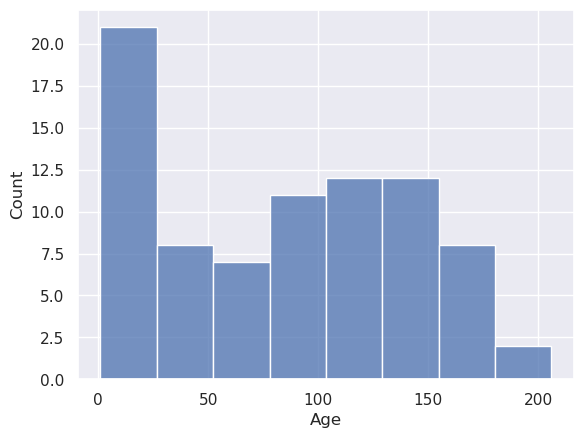

In [234]:
sns.histplot(data=kyphosis_data,x='Age')

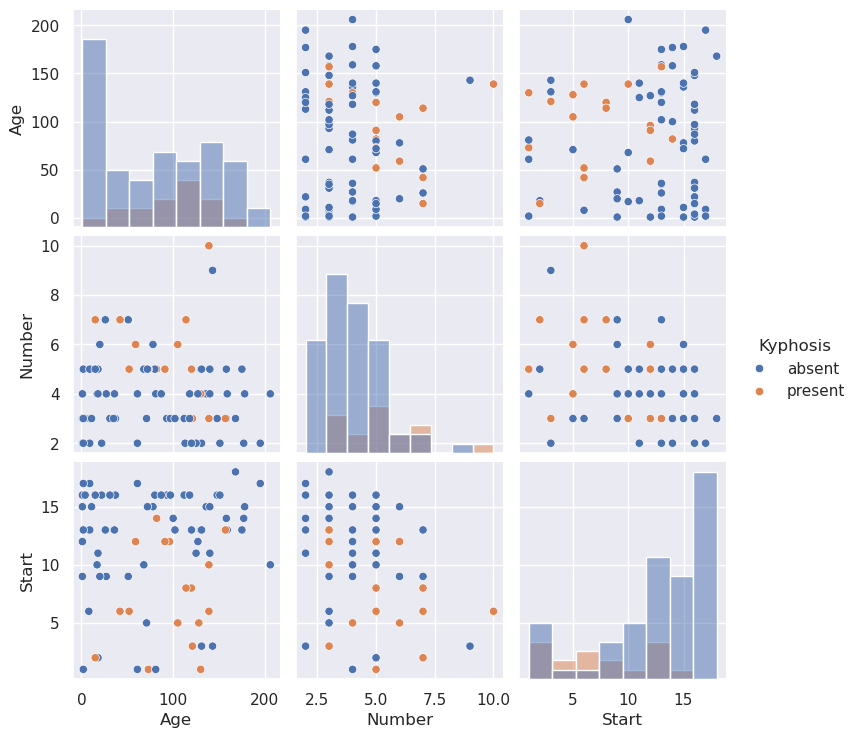

In [235]:
sns.set_theme()
sns.pairplot(kyphosis_data,hue="Kyphosis",diag_kind="hist")

In [236]:
X = kyphosis_data.drop('Kyphosis',axis=1)

In [237]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
# Label Encoding for target
label_encoder = LabelEncoder()
kyphosis_data["Kyphosis"] = label_encoder.fit_transform(kyphosis_data["Kyphosis"])
y = kyphosis_data["Kyphosis"]


In [238]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [239]:
from sklearn.tree import DecisionTreeClassifier

In [240]:
dtm = DecisionTreeClassifier()

In [241]:
dtm.fit(X_train,y_train)
y_pre = dtm.predict(X_test)

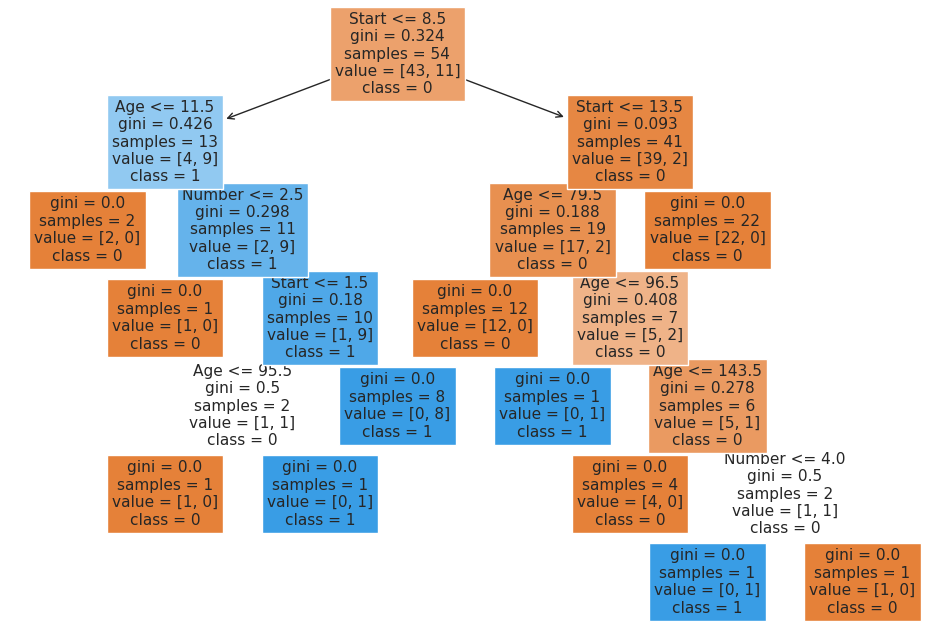

In [242]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dtm, filled=True, feature_names=X.columns, class_names=["0","1"])
plt.show()

In [243]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,y_pre))
print(accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))


              precision    recall  f1-score   support

           0       0.80      0.76      0.78        21
           1       0.29      0.33      0.31         6

    accuracy                           0.67        27
   macro avg       0.54      0.55      0.54        27
weighted avg       0.69      0.67      0.68        27

0.6666666666666666
[[16  5]
 [ 4  2]]


## Post Pruning and Pre Purning

In [244]:
dtm = DecisionTreeClassifier(max_depth=3)
dtm.fit(X_train,y_train)
y_pre = dtm.predict(X_test)

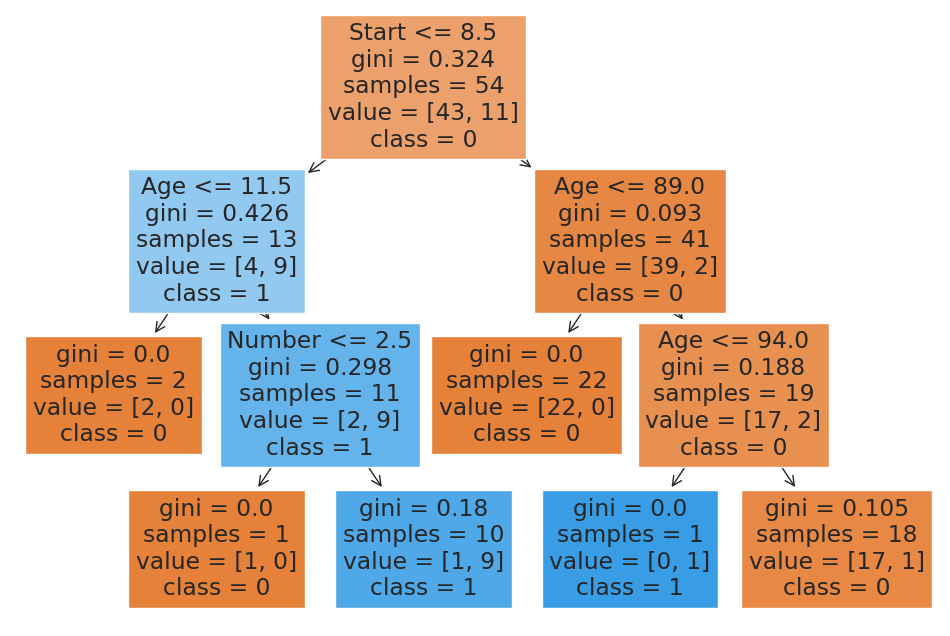

In [245]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dtm, filled=True, feature_names=X.columns, class_names=["0","1"])
plt.show()

In [246]:
print(classification_report(y_test,y_pre))
print(accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))


              precision    recall  f1-score   support

           0       0.80      0.76      0.78        21
           1       0.29      0.33      0.31         6

    accuracy                           0.67        27
   macro avg       0.54      0.55      0.54        27
weighted avg       0.69      0.67      0.68        27

0.6666666666666666
[[16  5]
 [ 4  2]]


### Pre pruning using hyperparmeter tuning

In [247]:
from sklearn.model_selection import GridSearchCV

In [248]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2, 5, 10]
}
clf = DecisionTreeClassifier()

grid_serach  = GridSearchCV(estimator=clf,param_grid=param_grid,scoring='accuracy',cv=5)
grid_serach.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [249]:
# Get the best parameters and estimator
best_params = grid_serach.best_params_
best_estimator = grid_serach.best_estimator_
# Make predictions with the best estimator
y_pred = grid_serach.predict(X_test)

In [250]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.33      0.33      0.33         6

    accuracy                           0.70        27
   macro avg       0.57      0.57      0.57        27
weighted avg       0.70      0.70      0.70        27

0.7037037037037037
[[17  4]
 [ 4  2]]


### Bagging Method (Random Forest)

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [253]:
rfc = RandomForestClassifier(n_estimators=200)

In [254]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [255]:
rfc_pre = rfc.predict(X_test)

In [257]:
print(classification_report(y_test,rfc_pre))
print(accuracy_score(y_test,rfc_pre))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.50      0.17      0.25         6

    accuracy                           0.78        27
   macro avg       0.65      0.56      0.56        27
weighted avg       0.73      0.78      0.73        27

0.7777777777777778
[[20  1]
 [ 5  1]]


### Hyper tuning random forest 

In [259]:
param_grid = {
    "criterion":["gini", "entropy", "log_loss"],
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [261]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

/home/jamxt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jamxt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jamxt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/jamxt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [262]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [269]:
print("Best score:", grid_search.best_score_)
best_estimator = grid_serach.best_estimator_
# Make predictions with the best estimator


Best score: 0.9072727272727272
